In [1]:
# import the stuff
from cetsp.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution, TripleMap, compute_tour_from_sequence

In [2]:
# create a simple instance

import random
circles = [Circle(Point(x*1.3, y*1.3), 1) for x in range(6) for y in range(6)]
instance = Instance(circles)

In [3]:
circles2 = [Circle(Point(1.1*x,1),1) for x in range(3)]
traj = compute_tour_from_sequence(circles2, True)
[traj[i] for i in range(len(traj))]

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


[Point(0.9999999265278243, 1),
 Point(1.099999999549415, 1),
 Point(1.2000000728317382, 1)]

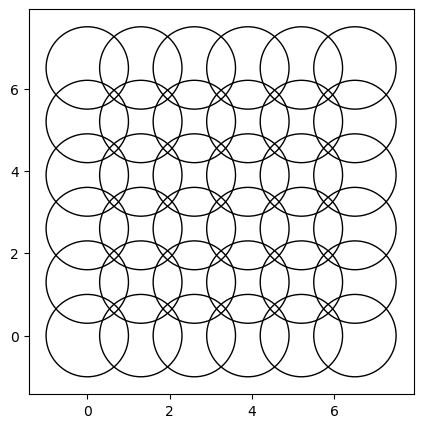

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [5]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

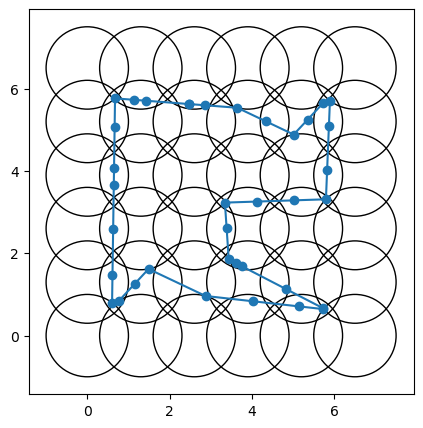

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution)

LB:Starting with root node of size 4
i	LB	|	UB
 20.34314581380186 19.343560972291925


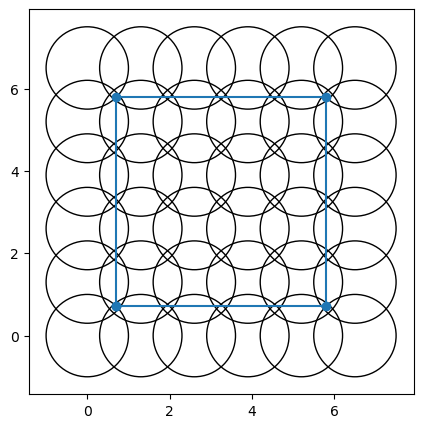

LB:0	20.6206	|	25.159
 20.62062613476837 19.224833022240446


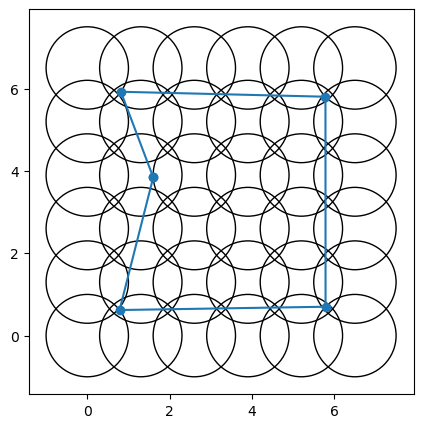

1	20.6206	|	25.159
LB: 20.89365600501399 19.106105075077725


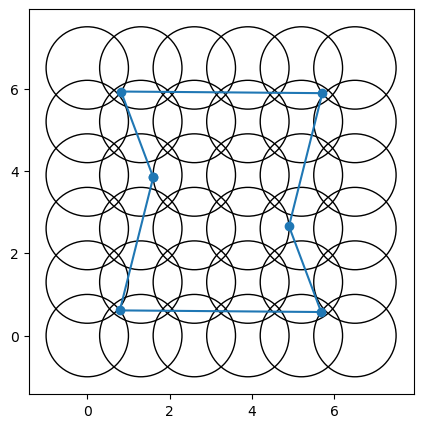

2	20.6206	|	25.159
LB: 20.923831960076463 19.181300416506357


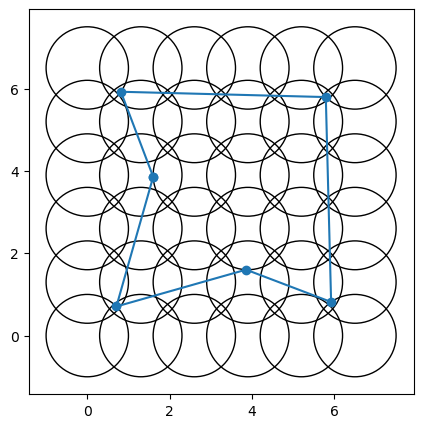

3	20.6206	|	25.159
LB: 21.23674692376086 19.166749900051087


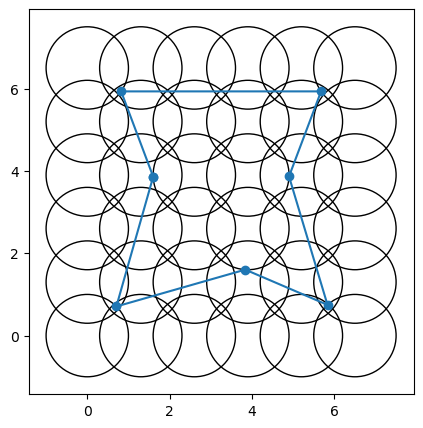

4	20.6206	|	25.159
LB: 21.419426848402946 19.102538076129033


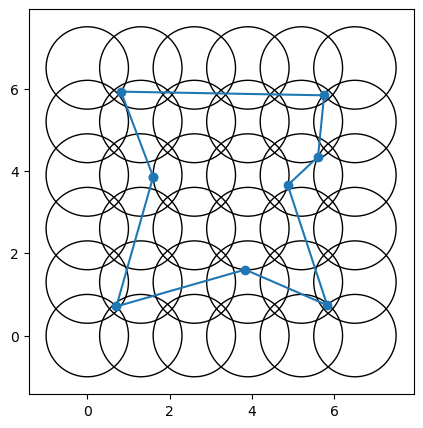

5	20.6206	|	25.159
LB: 21.45166560366371 19.128788812644476


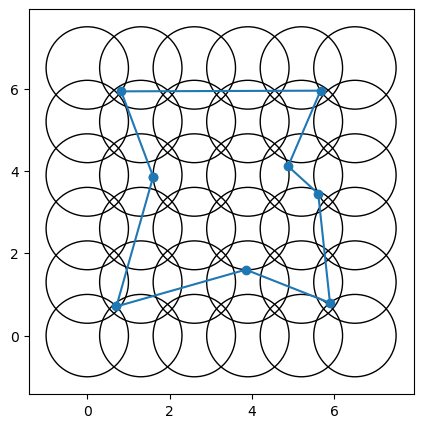

LB:6	20.6206	|	25.159
 21.236746923922404 19.16674989503044


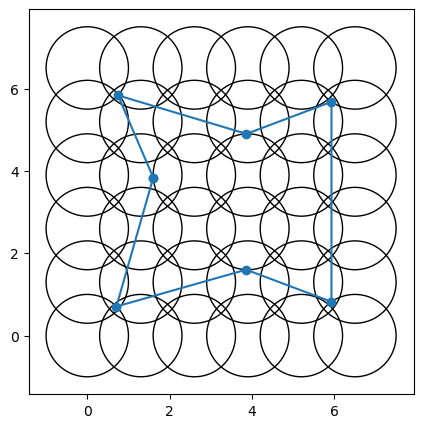

LB:7	20.6206	|	25.159
 21.419426847847248 19.102538072474484


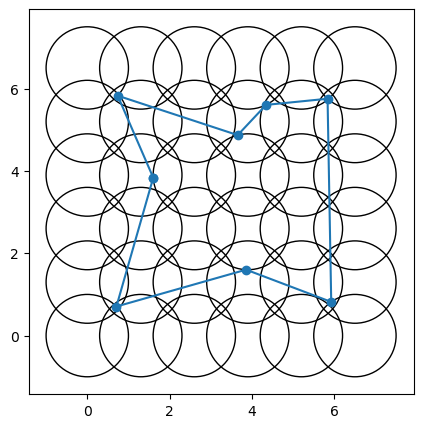

LB: 21.59881715142365 19.03832624364862
8	20.6206	|	25.159


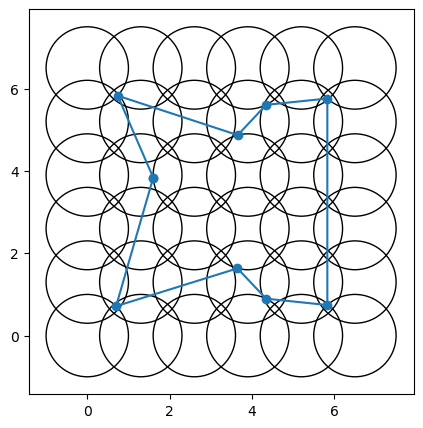

9	20.6206	|	25.159
LB: 21.644233308550895 19.09592999465002


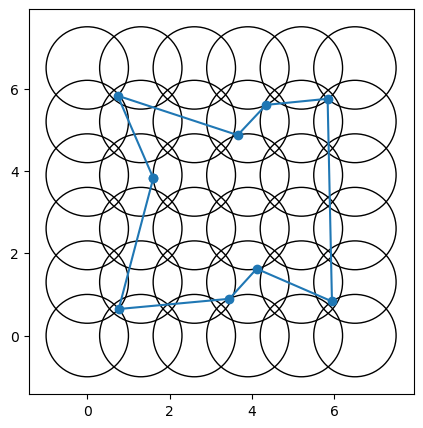

LB: 21.45166560364322 19.128788813918263
10	20.6206	|	25.159


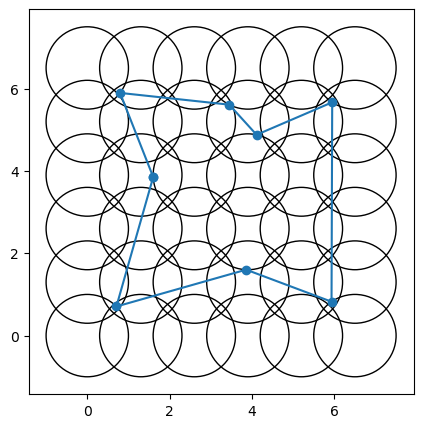

LB: 21.633226811564455 19.064576985092398


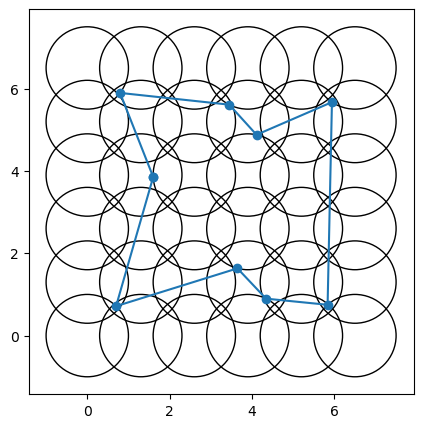

LB: 21.676227576322216 19.122180736093803


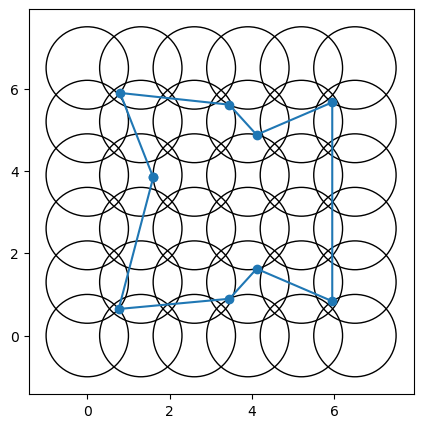

LB: 22.158541121426314 20.111690018886254


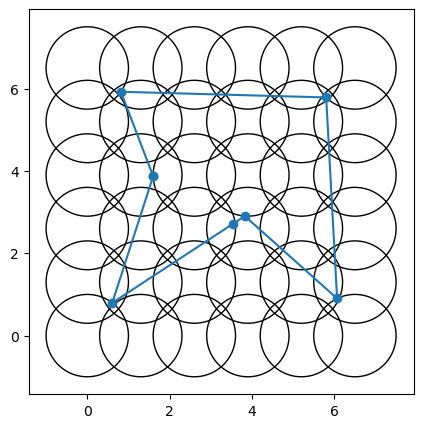

LB: 22.800363412520827 20.641845817630955


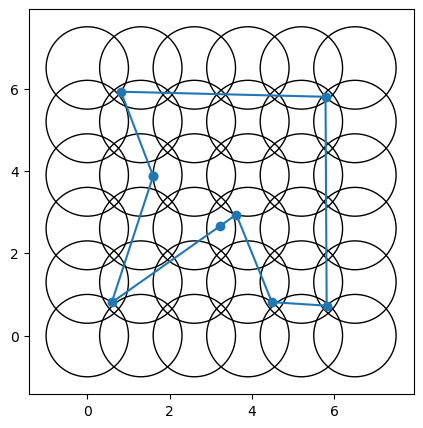

LB: 23.10939612595736 20.41974397638308


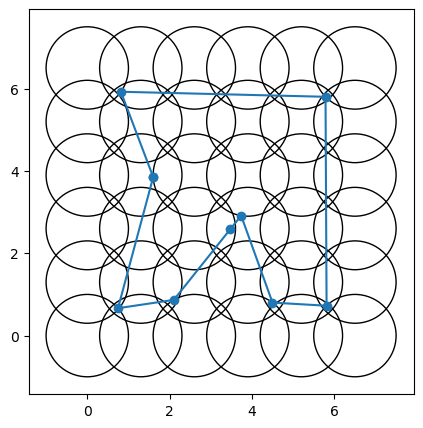

LB: 23.883095979651618 21.15617863721265


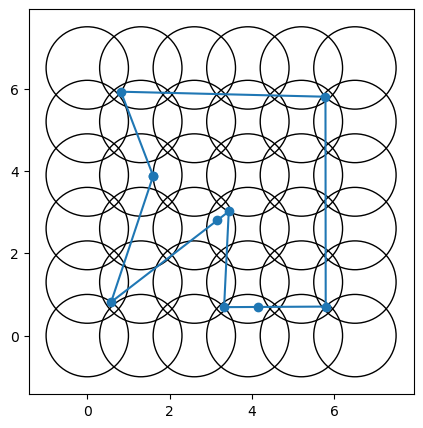

LB: 24.93454921944369 23.312346487733077


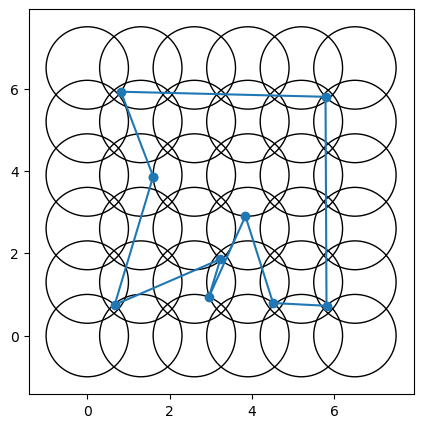

LB: 23.030083810255846 20.681362658368503


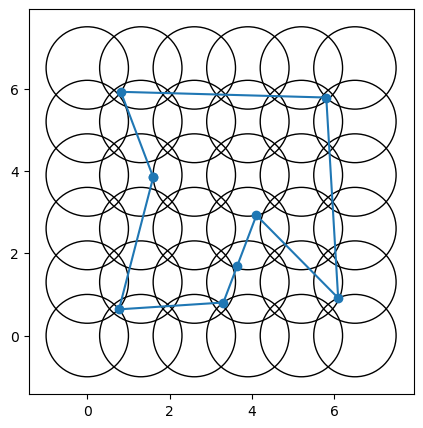

LB: 23.827917865521655 22.416348700661597


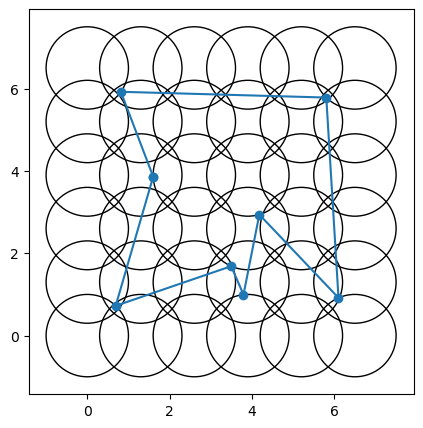

LB: 22.15854112275596 20.111690021840122
20	20.6206	|	25.159


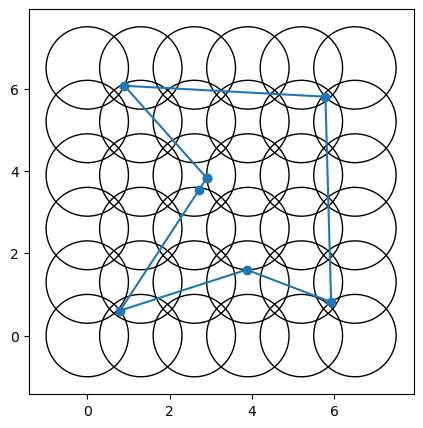

LB: 22.15855028283515 20.045353465162513


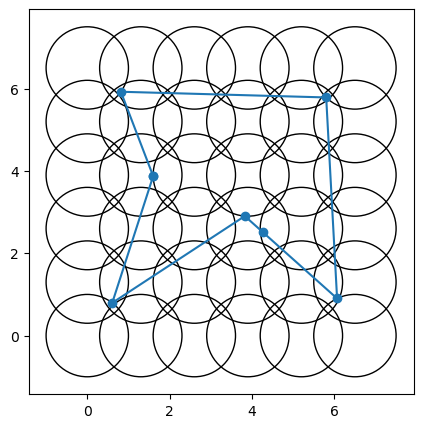

LB: 22.80038655827887 20.413599170291295


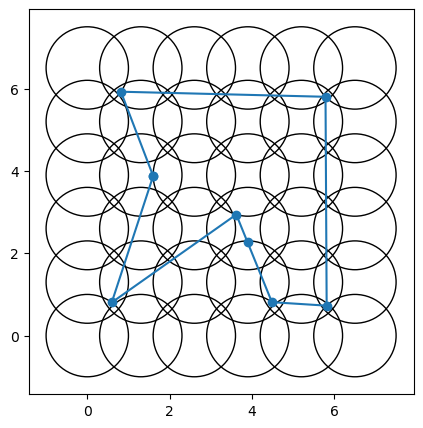

LB: 23.109394398722284 20.305282820255623


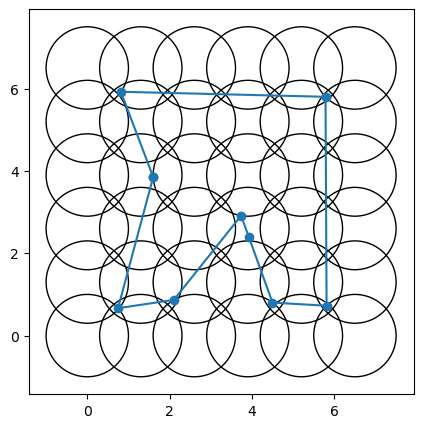

LB: 23.883106058322852 20.92417458216493


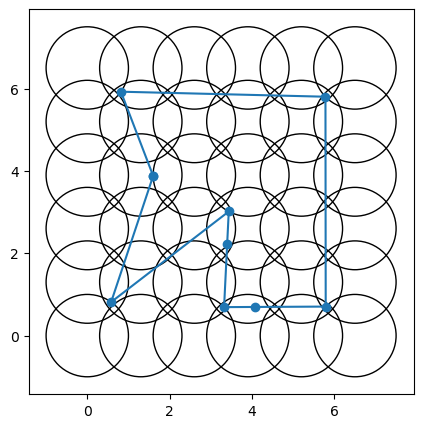

LB: 24.625222550091884 22.860399583012146


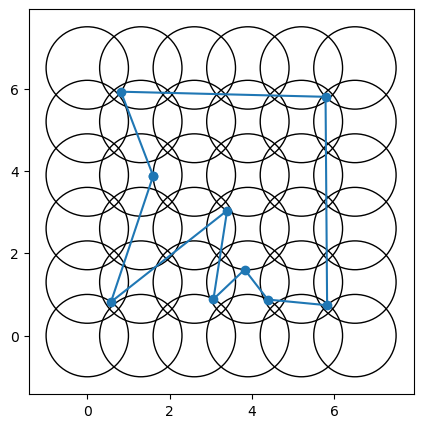

LB: 23.030080015773056 20.84525179718454


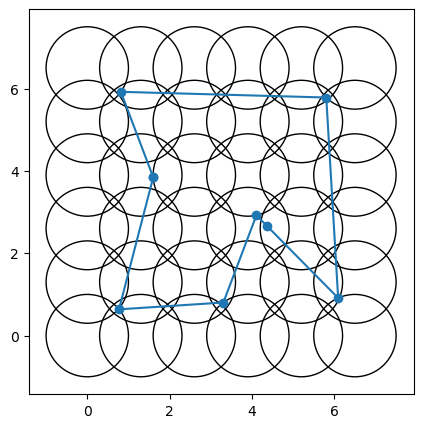

LB: 23.645211603267946 22.246737613363653


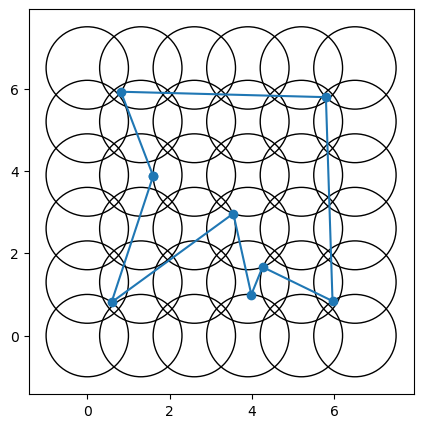

LB: 23.974733984726107 22.059432030952745


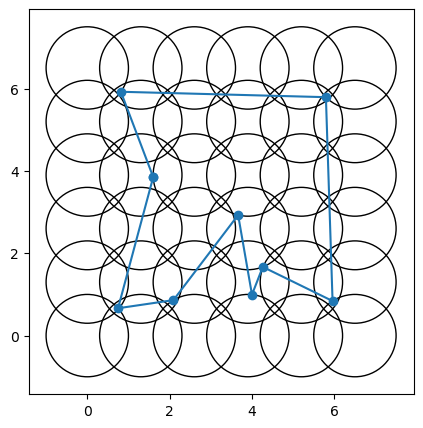

LB: 24.43577608451202 22.618936385759135


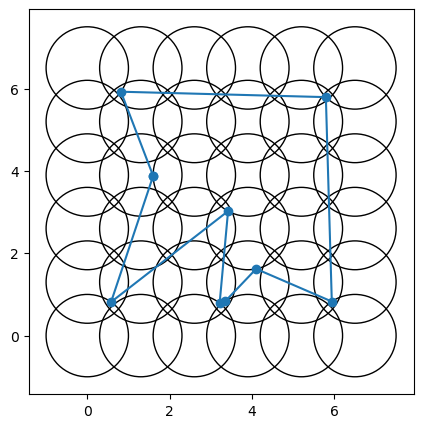

LB: 22.15855028311004 20.045353469962965
30	20.6206	|	25.159


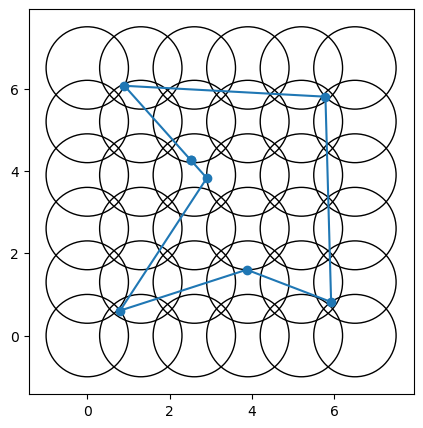

LB: 21.81986549707864 19.854254121338474


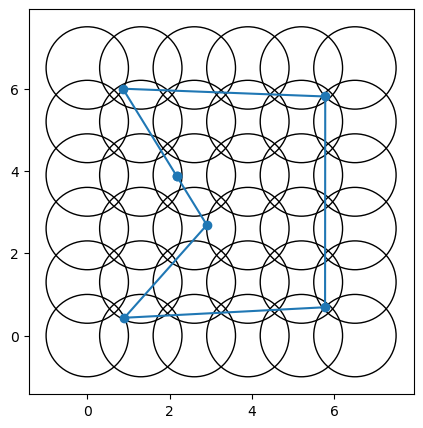

LB: 21.87883272540627 20.85902394777472


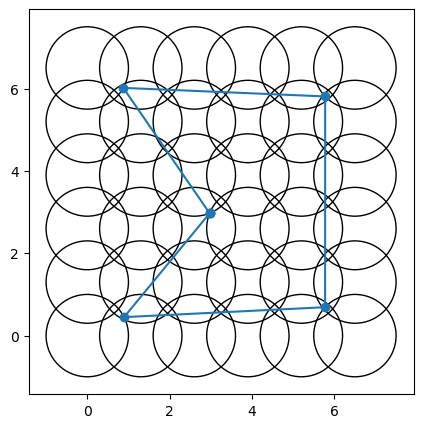

LB: 22.190219602437704 20.821562749347052


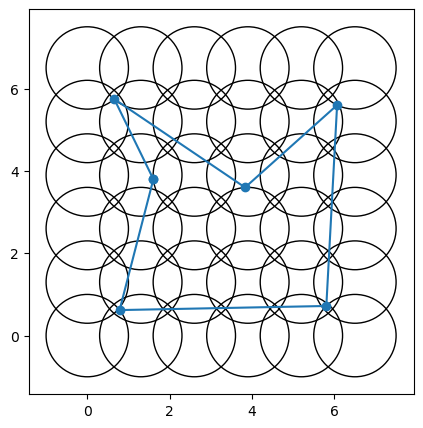

LB: 22.83459526997474 21.174671784498123


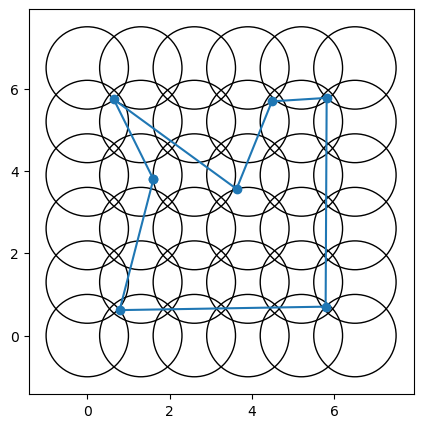

LB: 23.11616999233973 20.940621611787424


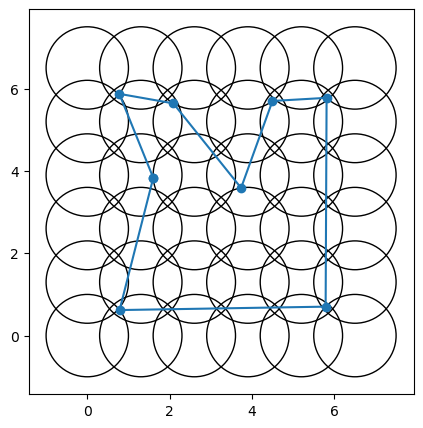

LB: 23.920166787235836 21.62665605793535


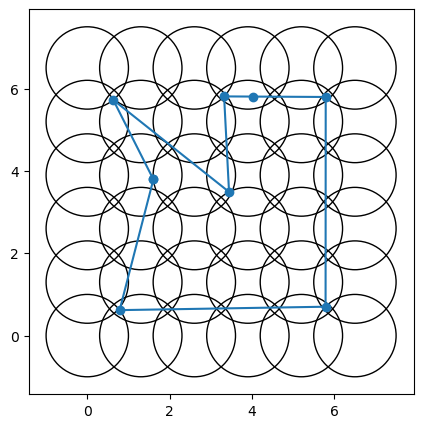

LB: 23.0323768929167 21.360386413347673


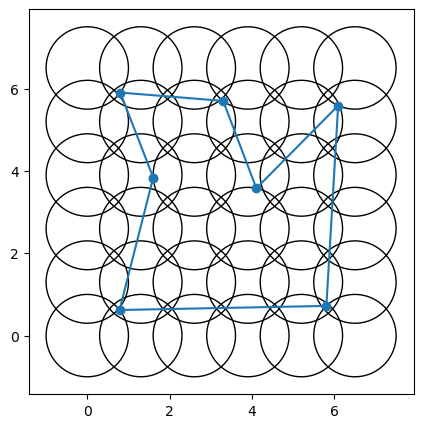

LB: 20.620626134828605 19.22483302416201


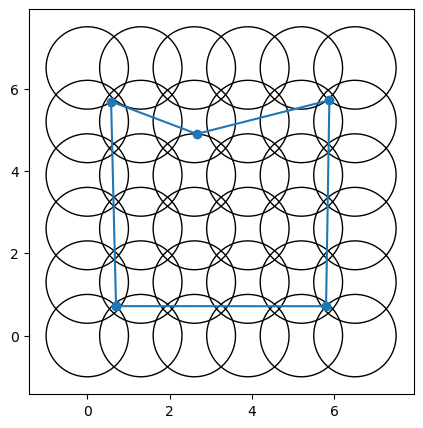

LB: 20.893656005132613 19.10610508202286


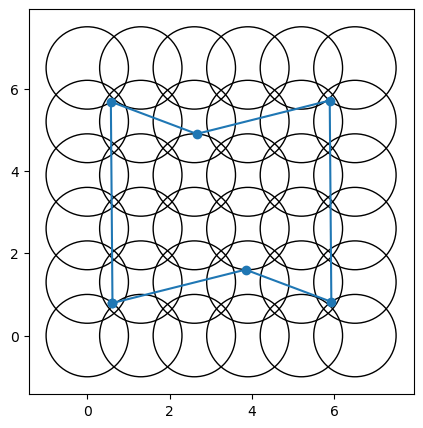

LB: 21.071115249255033 19.041893253196992
40	20.9238	|	25.159


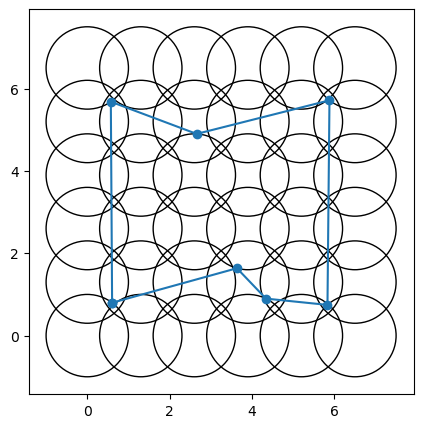

LB: 21.24896633185368 18.97768142995477


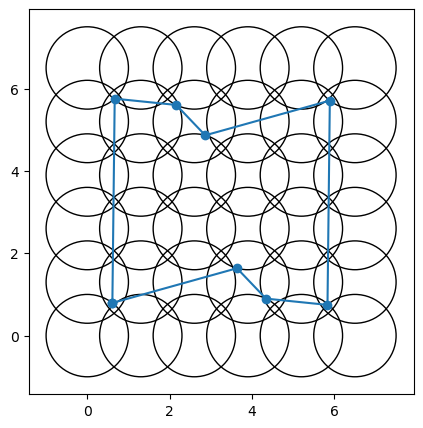

LB: 21.296712782946333 18.540026490693066


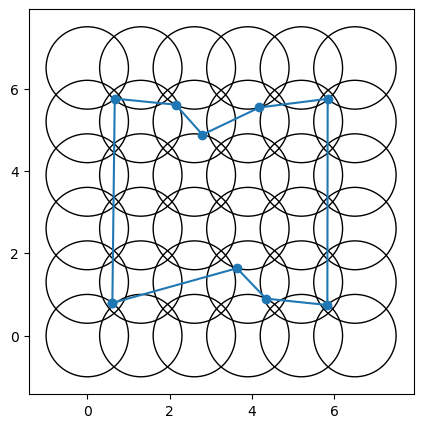

LB: 21.43492302547153 18.331963757315442


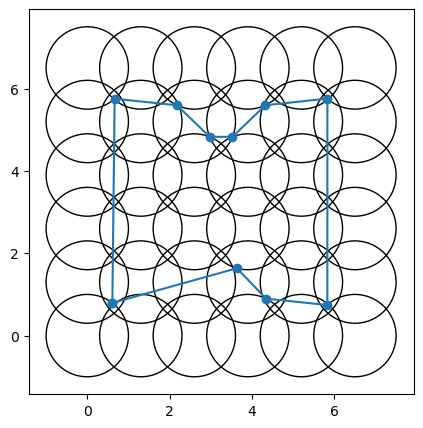

LB: 21.482660699146805 17.894308820056875


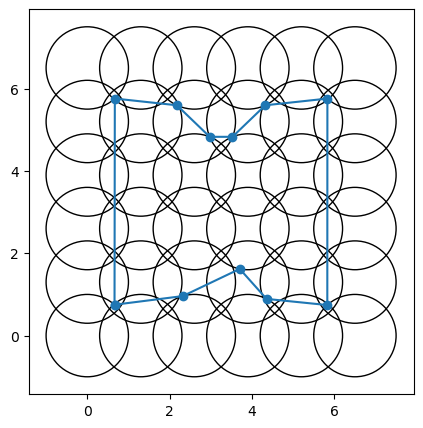

LB: 21.62093620306886 17.68624608334138


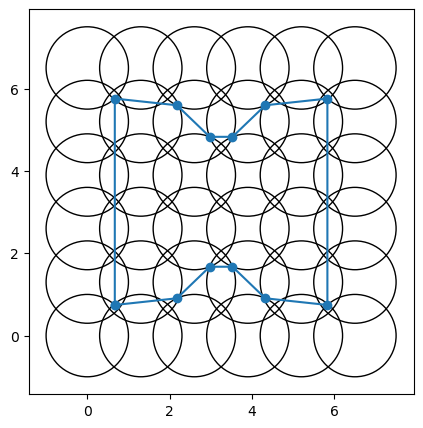

LB: 21.516185731474234 19.06102348366071
50	20.9238	|	21.6209


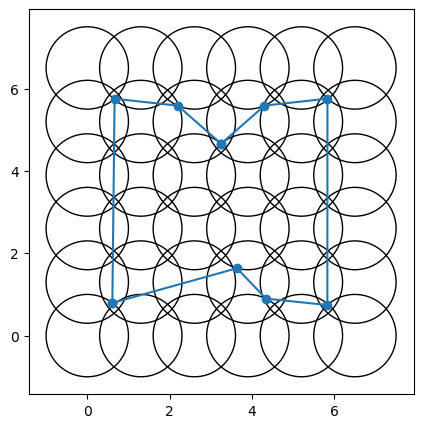

LB: 21.56392241511063 18.623368546402144


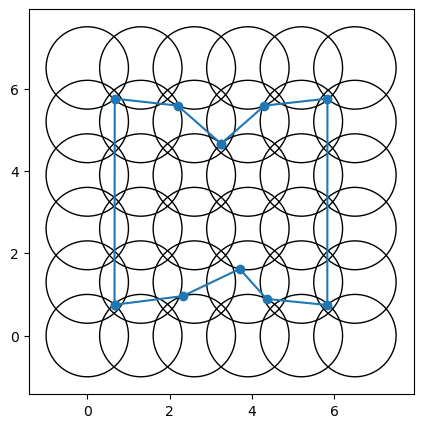

LB:60	20.9238	|	21.6209
70	20.9238	|	21.6209
 21.60847255714136 18.37815254651134


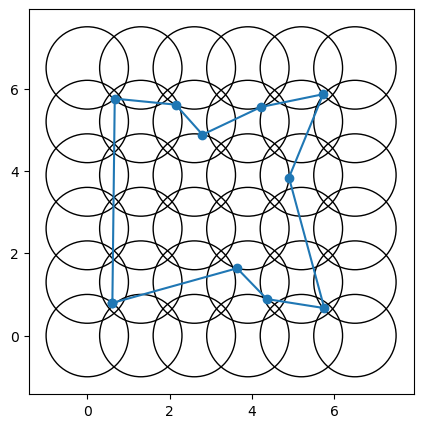

LB: 21.3153163423992 19.11857588791202
80	20.9238	|	21.6209


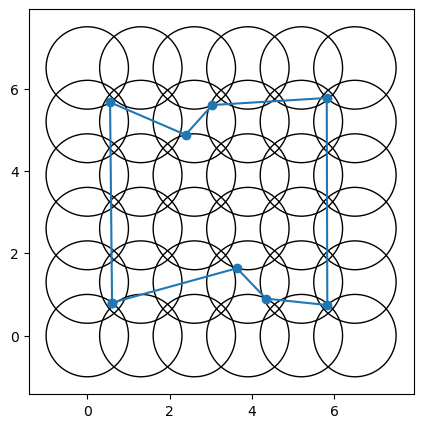

LB: 21.614995188692177 18.97062677741831


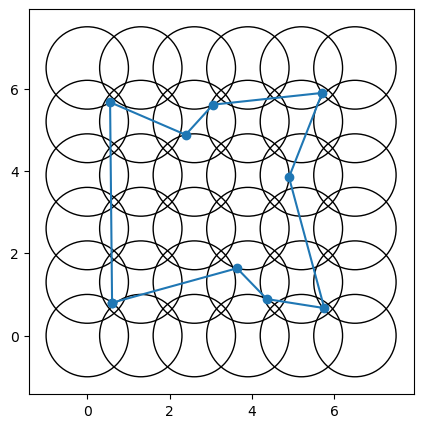

LB: 21.139117507191074 19.182787711230226
90	20.9238	|	21.6209


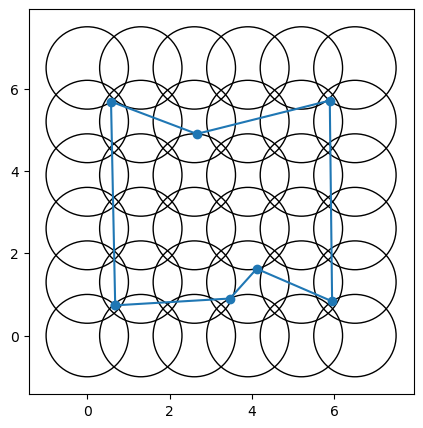

LB: 21.46627487728073 19.15777091238471


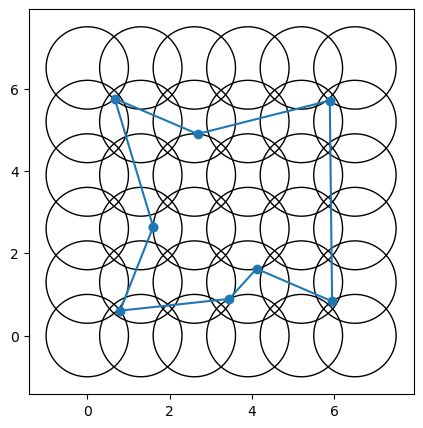

LB: 21.485239294849976 19.514739844711073


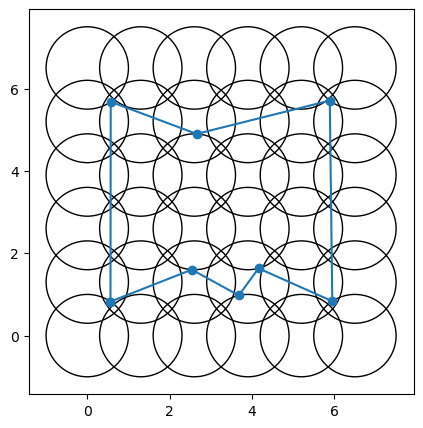

LB: 20.923831959890112 19.181300411693122
100	20.9238	|	21.6209


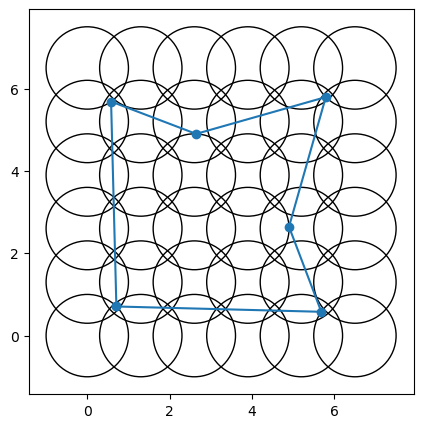

LB: 21.236746923741546 19.16674990412344


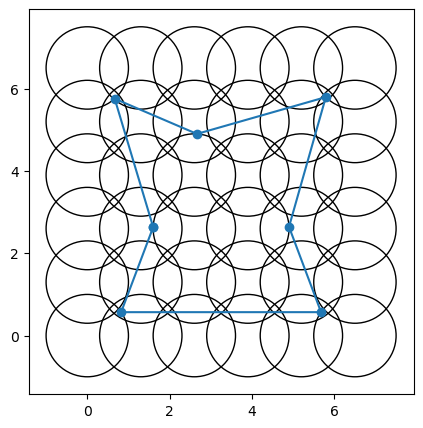

LB: 21.236746924079334 19.166749889384445


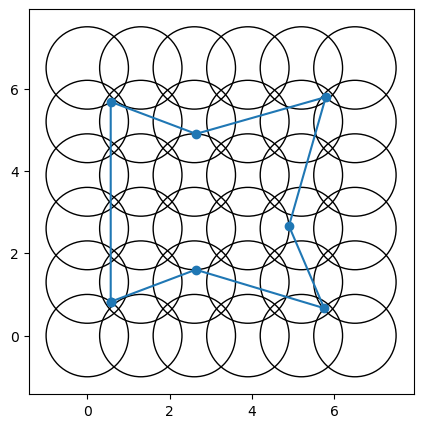

---------------
105	21.4194	|	21.6209


In [7]:
timelimit = 60
num_nodes_explored = 0
ub, lb = None, None
tm  = TripleMap(instance)
def count(event):
    global num_nodes_explored
    global ub
    global lb
    global tm
    global instance
    num_nodes_explored += 1
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    seq = event.current_node.get_fixed_sequence()
    lb_ = sum(tm.get_cost(seq[i], seq[(i+1)%len(seq)], seq[(i+2)%len(seq)]) for i in range(len(seq)))
    print("LB:", event.get_relaxed_solution().length(), lb_)

    plt.figure(figsize=(5, 5))
    plot_solution(plt.gca(), instance, event.get_relaxed_solution())
    plt.show()
    if not event.current_node.get_relaxed_solution().is_simple():
        print("not simple!")
    assert(lb_<=event.get_relaxed_solution().length())
opt_solution = branch_and_bound(instance, count, initial_solution, timelimit)

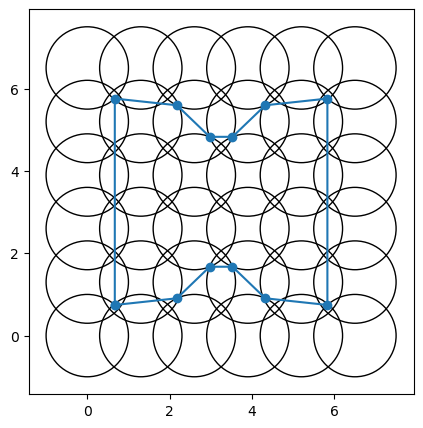

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)

In [9]:
num_nodes_explored, lb, ub

(58, 21.236746924079334, 21.62093620306886)

6.486266189891131
5.423641167965052 2.711820583982526
3.6050143994050243
3.5154332036804457 1.7577166018402228
2.672840072695643
2.1109610252983253 1.0554805180541187
3.139022201570835
2.206636118268298 1.1033180603238164
2.4678620716572315
1.9000003308449416 0.9500001654224708
6.750981709710117
5.850315343775331 2.9251576718876655
10.065706577347786
9.67178048553944 4.835890243376243
7.159724975644149
6.367921338529313 3.1839606686062387
5.4187737613813205
5.265668257655745 2.632834123719351


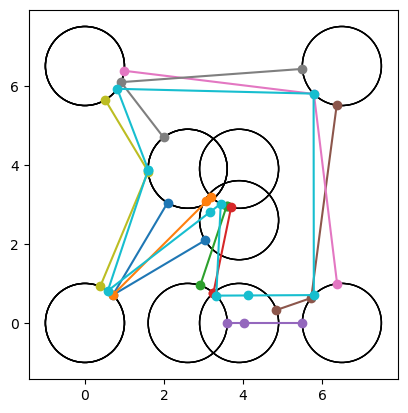

23.883095979651618 21.15617863721265


In [10]:
plt.figure()
indices = [15, 0, 20, 21, 12, 18, 30, 35, 5]
sol_traj = compute_tour_from_sequence([instance[i] for i in indices], False)
lb = sol_traj.length()
lb_ = 0
for i in range(len(indices)):
    u = indices[i]
    v = indices[(i+1)%len(indices)]
    w = indices[(i+2)%len(indices)]
    traj = compute_tour_from_sequence([instance[u], instance[v], instance[w]], True)
    print(sol_traj[i].dist(sol_traj[i+1])+sol_traj[i+1].dist(sol_traj[(i+2)%len(indices)]))
    print(traj.length(), tm.get_cost(u,v,w))
    plot_solution(plt.gca(), Instance([instance[u], instance[v], instance[w]]), traj)
    lb_ += tm.get_cost(u,v,w)
traj = compute_tour_from_sequence([instance[i] for i in indices], False)
plot_solution(plt.gca(), Instance([instance[u], instance[v], instance[w]]), sol_traj)
plt.show()
print(lb, lb_)